In [4]:
import sqlite3
import pandas as pd

In [2]:
# connect to the database
con = sqlite3.connect ('weather.db')

In [12]:
# define the query
query = """
select day, avg(F) as est_F
from stations join temps using (station)
where lat != '' and lat != 0 and lon != '' and lon != 0
and station != ''
and lat between 28.0 and 28.8
and lon between -80.8 and -80.4
and month = 1
group by day 
order by day, F
"""

In [13]:
# call the query and save the result in pandas
daily_data_db = pd.read_sql_query(query, con)
daily_data_db

,day,est_F
0,1,65.328571
1,2,68.242857
2,3,65.857143
3,4,68.971429
4,5,63.100000
5,6,54.342857
6,7,64.814286
7,8,64.457143
8,9,66.271429
9,10,69.457143


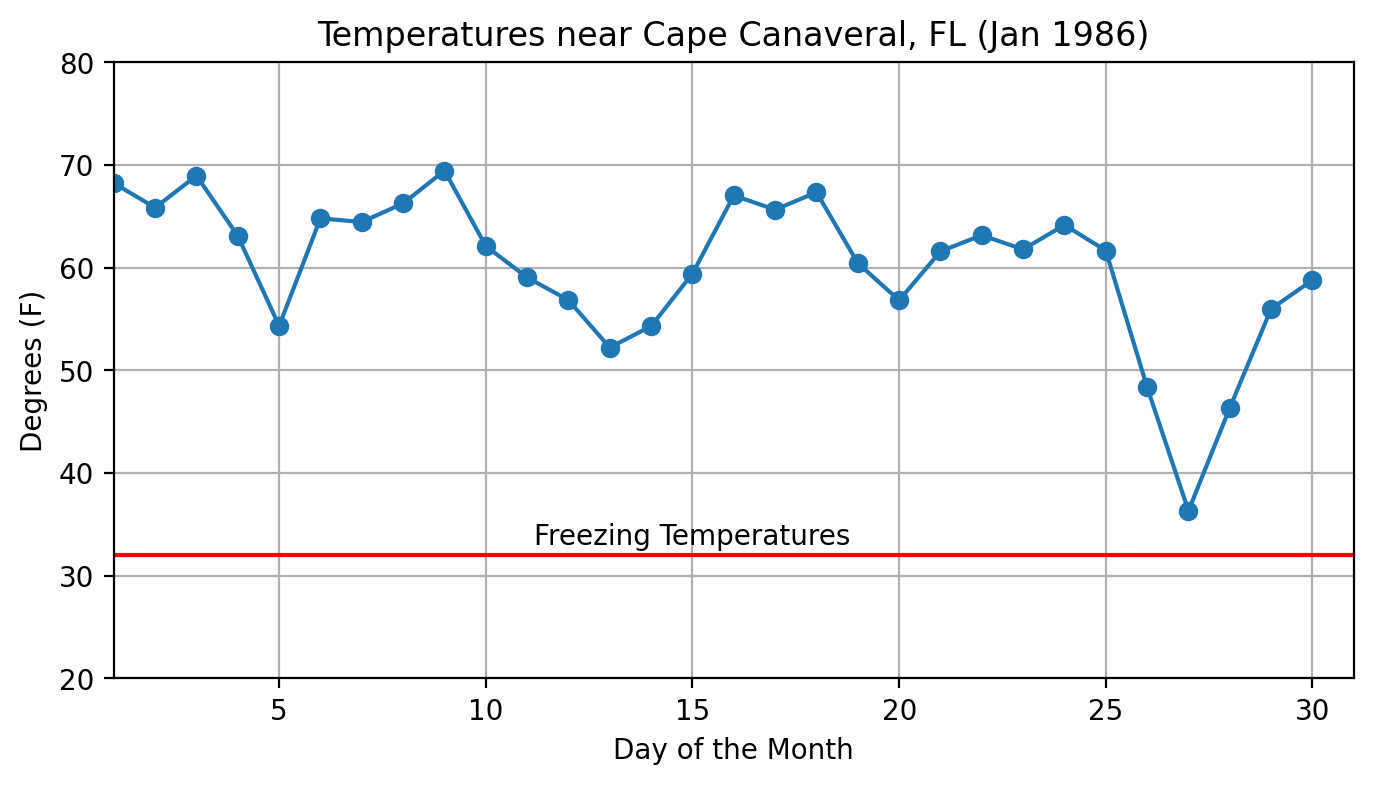

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=200)
plt.title("Temperatures near Cape Canaveral, FL (Jan 1986)")
plt.xlabel("Day of the Month")
plt.ylabel("Degrees (F)")
plt.ylim(20,80)
plt.xlim(1,31)
plt.grid()
plt.plot(daily_data_db.est_F, marker='o')
plt.plot([1,31], [32,32], c='red')
plt.text(15, 33, 'Freezing Temperatures', ha='center')
plt.show()